##M. Brian Curlee
Highly analytical and dedicated professional with recent education and hands-on experience in software development, game design, computer networking, and virtualization. Excited to advance and expand my skillset through targeted mentorship and collaboration in an innovative environment. 
#mcurlee3@uncc.edu
#https://www.linkedin.com/in/mbriancurlee/

##Purpose
I have created this notebook to demonstrate some of the skills that I have gained through my exploration of Data Science and Applied Machine Learning at The University of North Carolina at Charlotte.

#Drive Setup
The folder for this project and any applicable datasets should be available for viewing. 


In [5]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#Import Libraries


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

#Abalone Dataset
I chose this dataset because its small enough to be efficient, but robust enough to provide some play room. 

In [195]:
#I chose to download the data here and just keep it in a shared folder with the ipynb
%ls /content/gdrive/MyDrive/M_B_Curlee_Demo/PYNB/abalone.data
names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df_abalone = pd.read_csv("/content/gdrive/MyDrive/ITCS6100/Week3/abalone.data", names=names)
df_abalone.describe()


/content/gdrive/MyDrive/M_B_Curlee_Demo/PYNB/abalone.data


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#Seaborn Pairplot with 'Sex' as the target

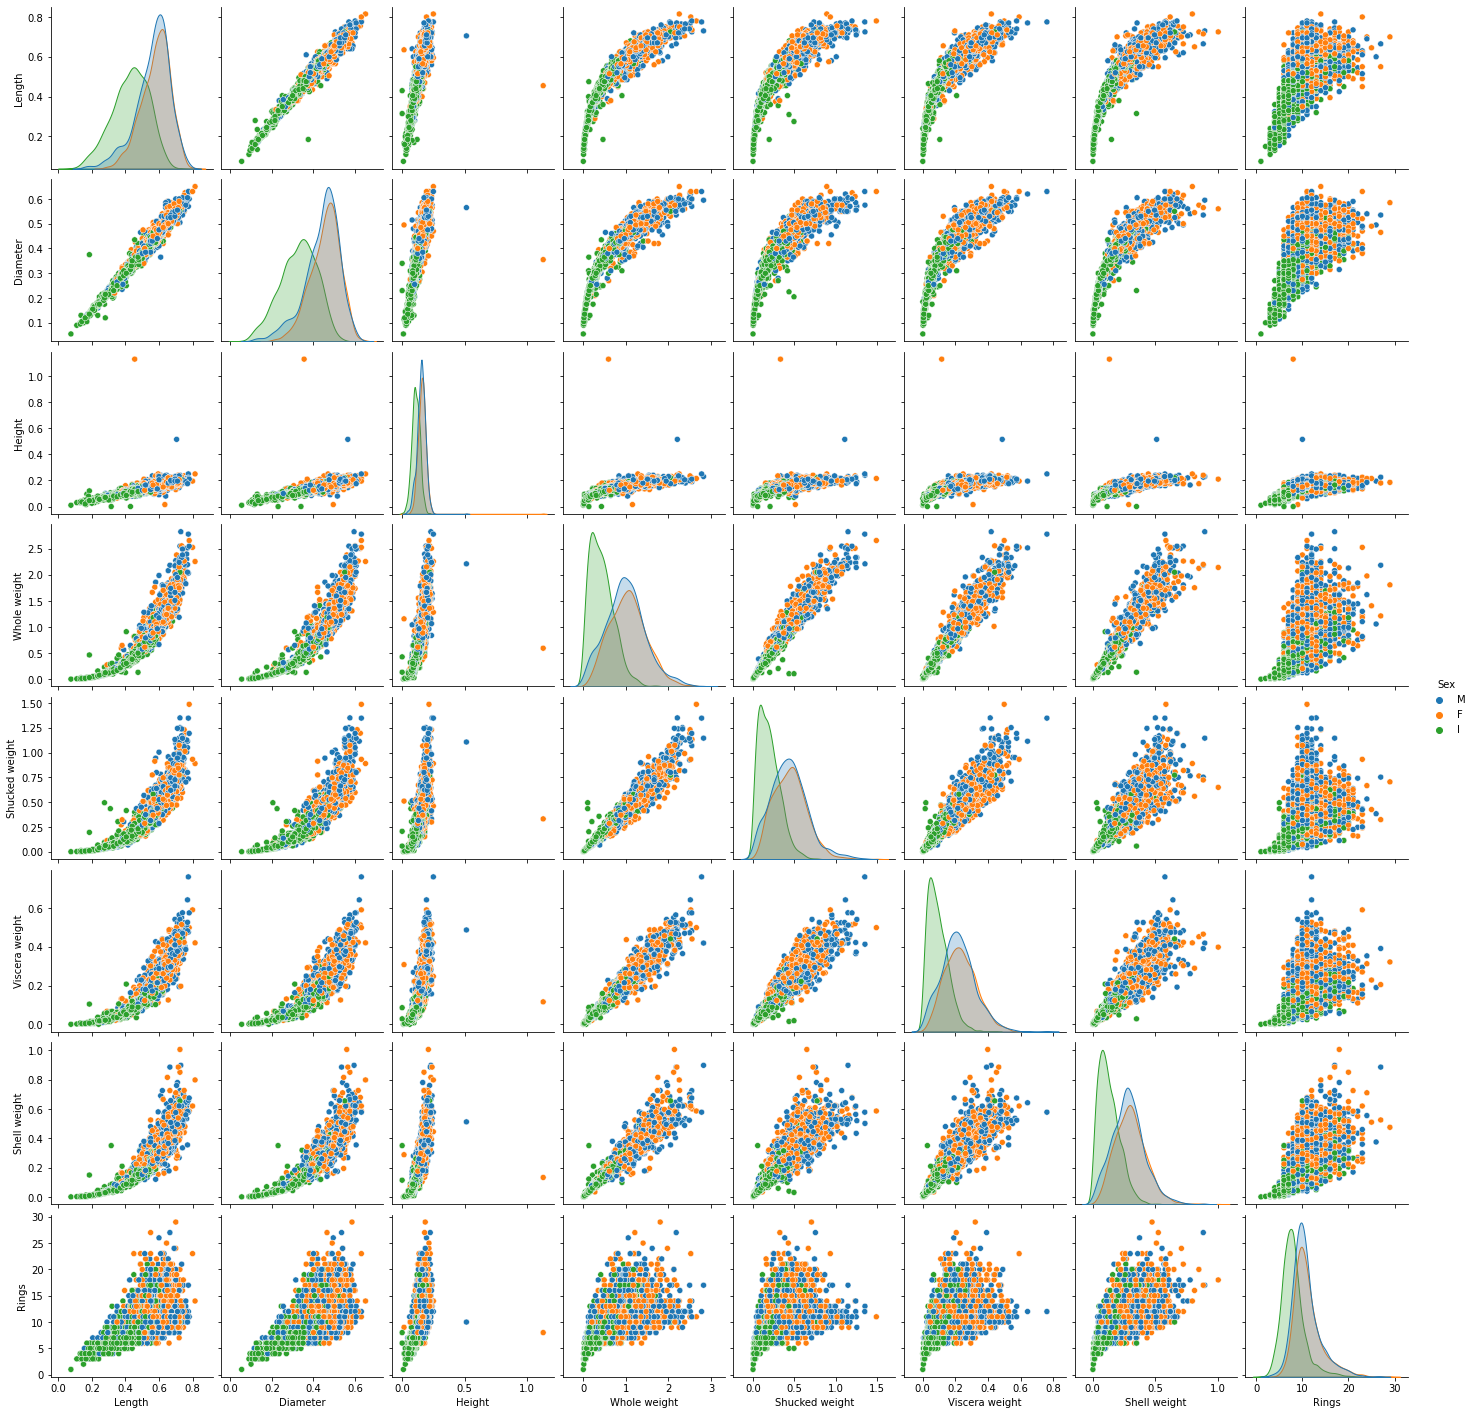

In [27]:
sns.pairplot(df_abalone, hue='Sex')

#Scatter Matrix

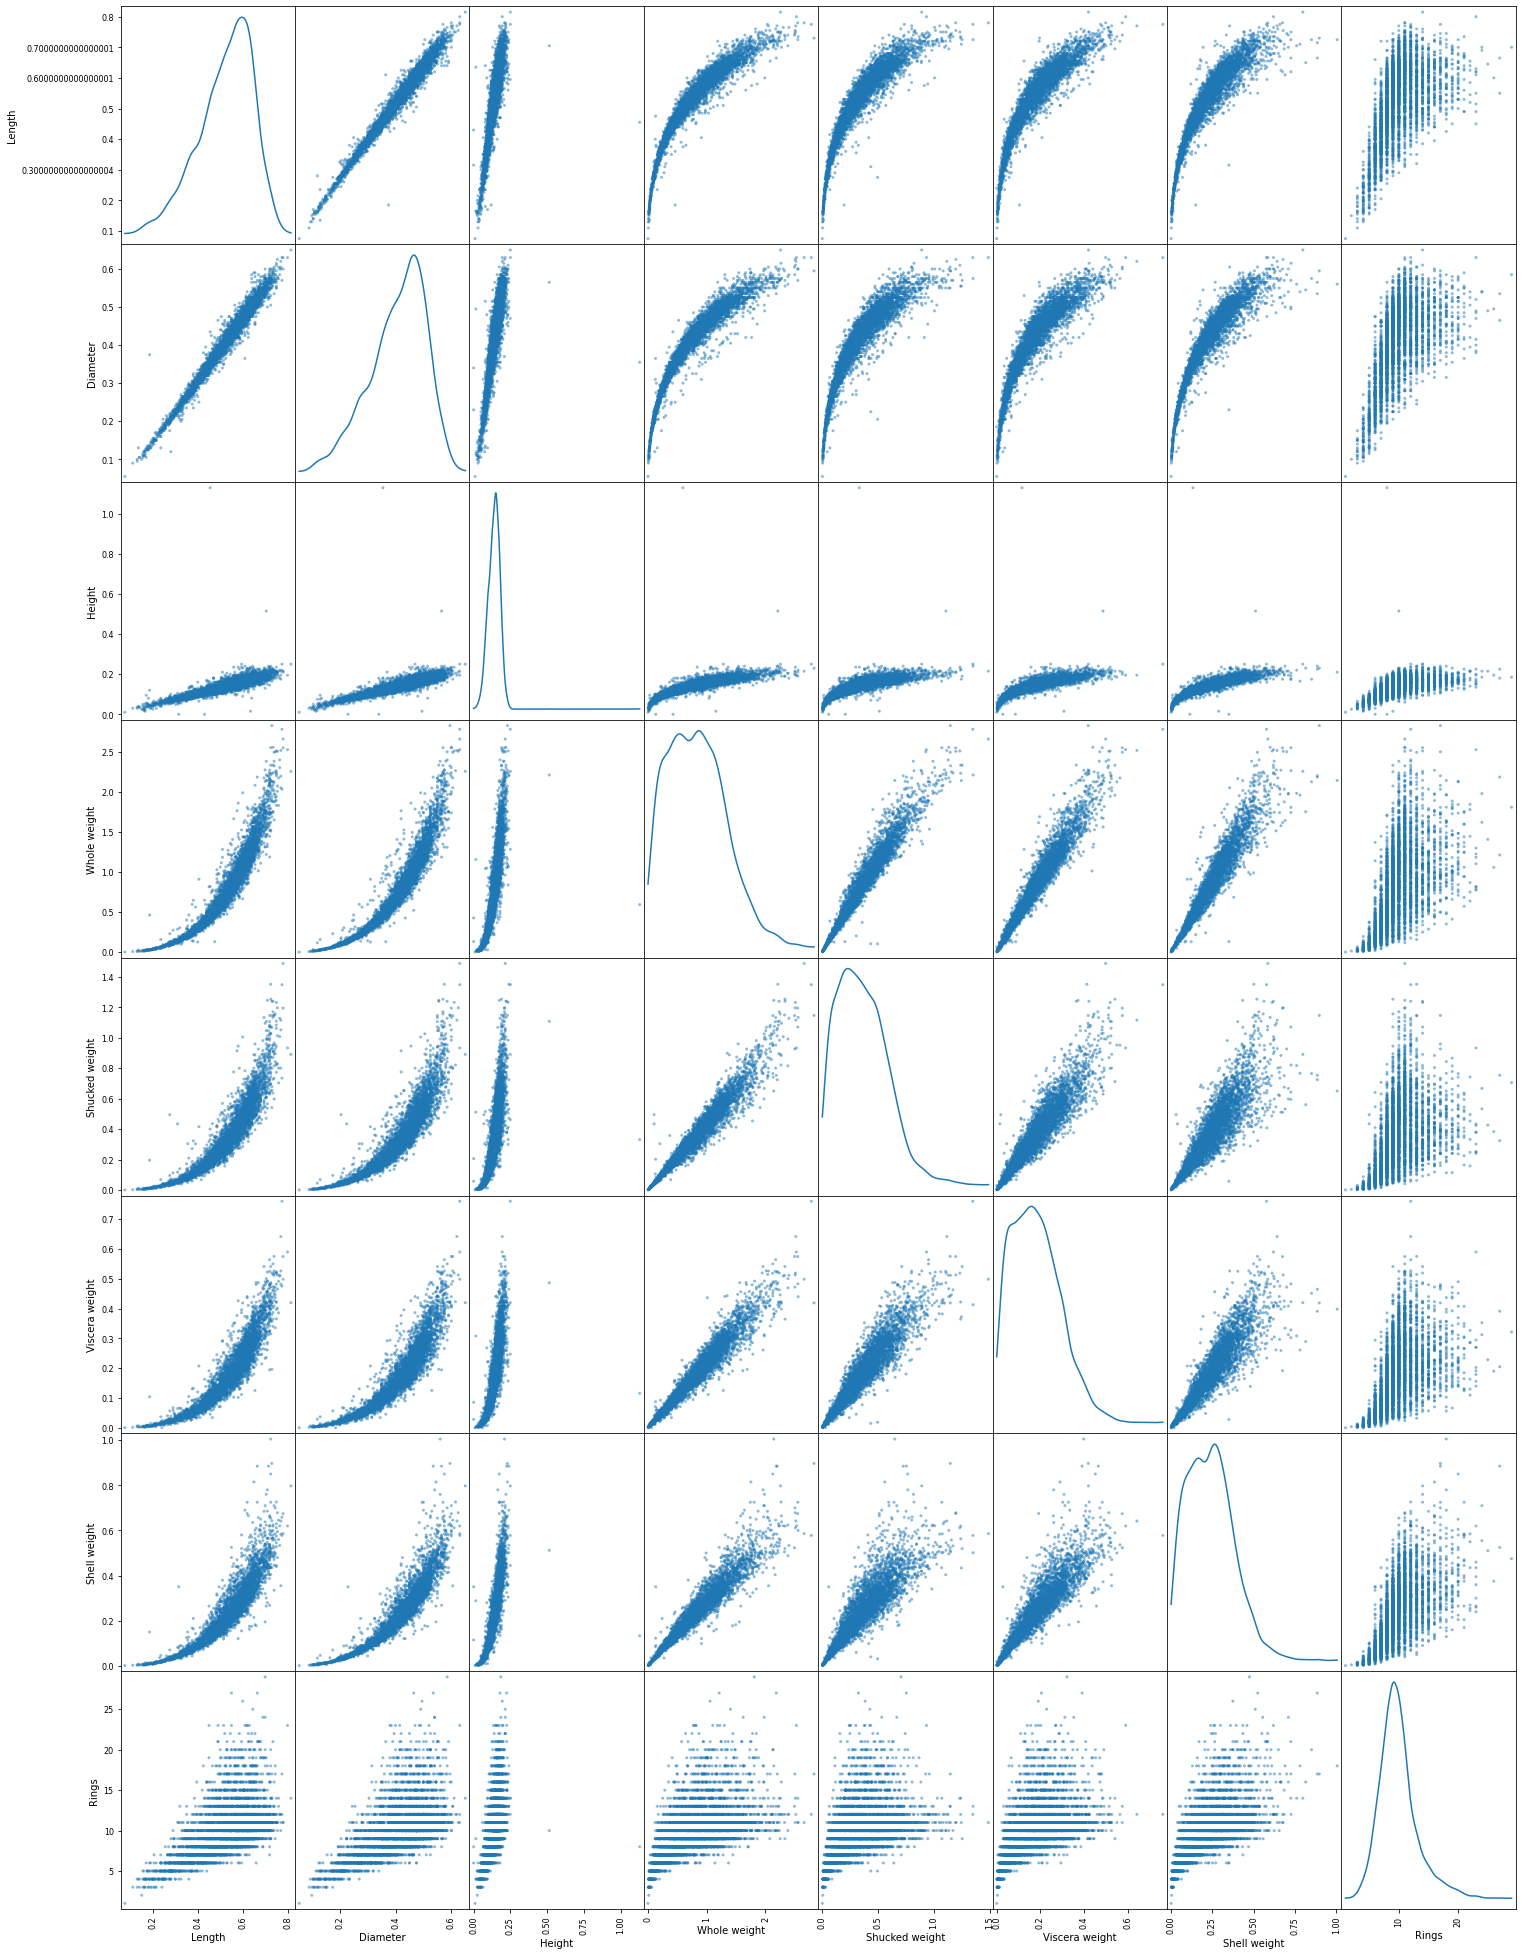

In [28]:
fig = pd.plotting.scatter_matrix(df_abalone, figsize=(25,35), diagonal='kde')

#Seperate Scatters of each feature and target 'Sex'

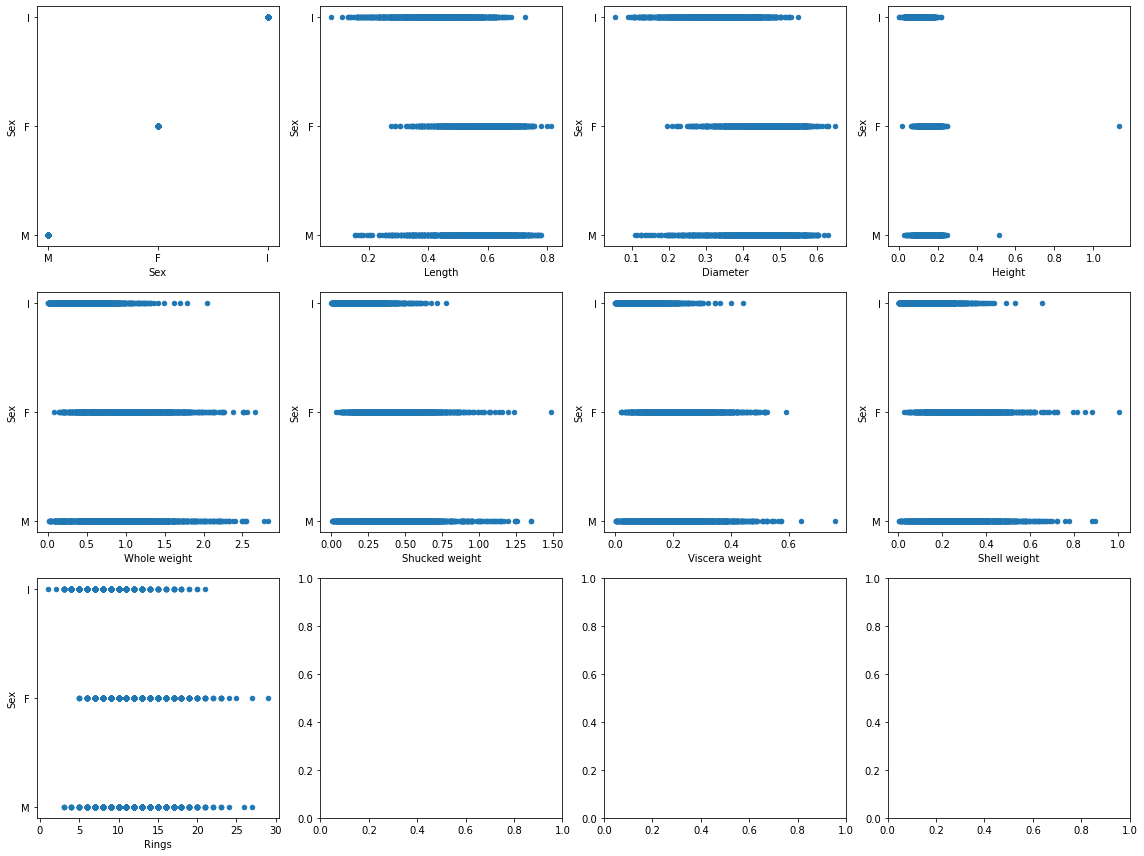

In [18]:
fig, axes = plt.subplots(3,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i,c  in enumerate(df_abalone):
    df_abalone.plot.scatter(c, 'Sex', ax=axes[int(i/4), i%4])
fig.tight_layout()

#Data Preprocessing
As seen from the data the 'Sex' category could be interesting but the data needs some processing.

Create a copy of the original for later use

In [196]:
#copy of the original
df_copy = df_abalone

In [177]:
df_abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Here the 'Sex' category is split and enumerated

In [178]:
Gender = df_abalone.pop('Sex')
df_abalone['M'] = (Gender == 'M')*1.0
df_abalone['F'] = (Gender == 'F')*1.0
df_abalone['I'] = (Gender == 'I')*1.0
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.365813,0.312904,0.321283
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.481715,0.463731,0.467025
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


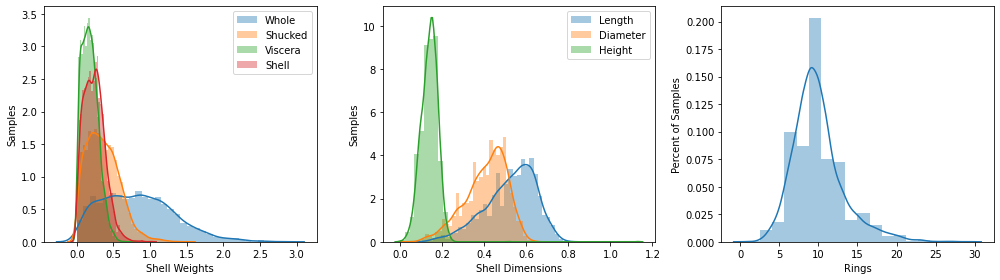

In [179]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot weight information
sns.distplot(df_abalone['Whole weight'],   label='Whole',   ax=ax1)
sns.distplot(df_abalone['Shucked weight'], label='Shucked', ax=ax1)
sns.distplot(df_abalone['Viscera weight'], label='Viscera', ax=ax1)
sns.distplot(df_abalone['Shell weight'],   label='Shell',   ax=ax1)
ax1.legend()
ax1.set(xlabel='Shell Weights', ylabel='Samples')

# Plot dimension information
sns.distplot(df_abalone['Length'],   label='Length', ax=ax2)
sns.distplot(df_abalone['Diameter'], label='Diameter', ax=ax2)
sns.distplot(df_abalone['Height'],   label='Height', ax=ax2)
ax2.legend()
ax2.set(xlabel='Shell Dimensions', ylabel='Samples')

# Plot system response
sns.distplot(df_abalone['Rings'], bins=18, ax=ax3)
ax3.set(ylabel='Percent of Samples')
plt.tight_layout()

#Preprocessing/Evaluation 'Rings'

Rings may be a more interesting feature to explore...


In [180]:
np.sort(df_abalone['Rings'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [181]:
df_abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [182]:
more_than_100_samples = df_abalone['Rings'].value_counts() > 100
df_abalone['Rings'].value_counts()[more_than_100_samples]

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: Rings, dtype: int64

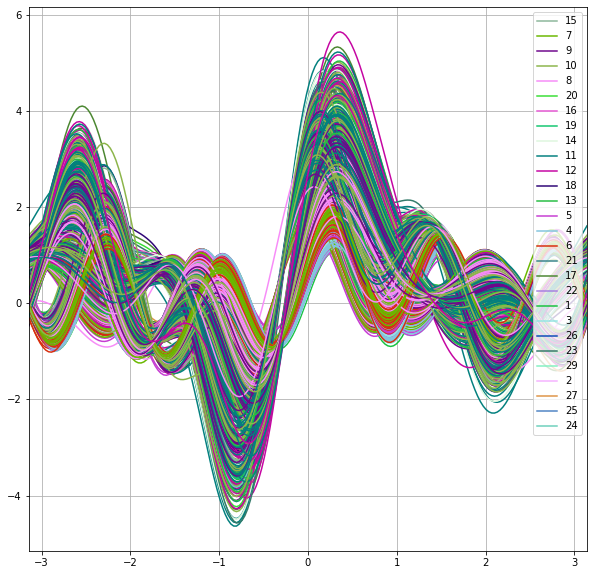

In [183]:
plt.figure(figsize = (10,10))

pd.plotting.andrews_curves(df_abalone, 'Rings')

From here we can see that number of rings has the highest correlation with shell diameter (makes sense)

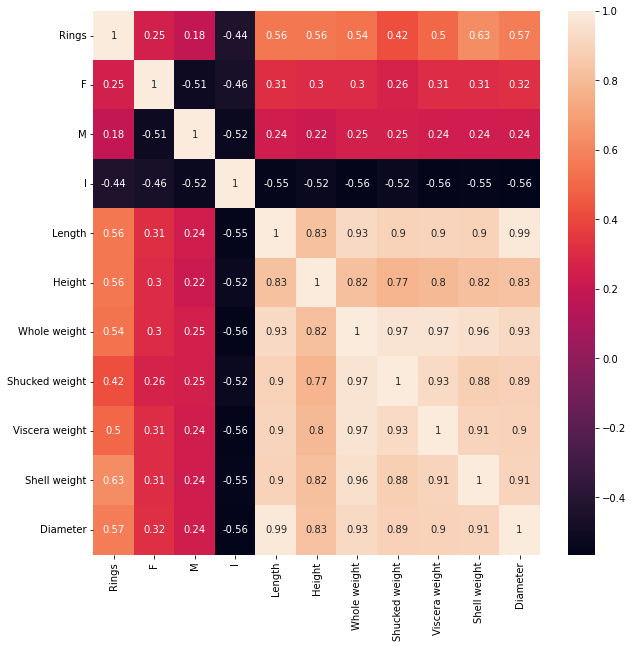

In [148]:
plt.figure(figsize = (10,10))
sns.heatmap(df_abalone.corr(), annot = True)

#Organization
This step more than anything is just for ease of use

In [184]:
df_abalone = df_abalone[['Rings', 'F', 'M', 'I', 'Length', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Diameter']]


In [185]:
df_abalone.describe()

,Rings,F,M,I,Length,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Diameter
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,9.933684,0.312904,0.365813,0.321283,0.523992,0.139516,0.828742,0.359367,0.180594,0.238831,0.407881
std,3.224169,0.463731,0.481715,0.467025,0.120093,0.041827,0.490389,0.221963,0.109614,0.139203,0.099240
min,1.000000,0.000000,0.000000,0.000000,0.075000,0.000000,0.002000,0.001000,0.000500,0.001500,0.055000
25%,8.000000,0.000000,0.000000,0.000000,0.450000,0.115000,0.441500,0.186000,0.093500,0.130000,0.350000
50%,9.000000,0.000000,0.000000,0.000000,0.545000,0.140000,0.799500,0.336000,0.171000,0.234000,0.425000
75%,11.000000,1.000000,1.000000,1.000000,0.615000,0.165000,1.153000,0.502000,0.253000,0.329000,0.480000
max,29.000000,1.000000,1.000000,1.000000,0.815000,1.130000,2.825500,1.488000,0.760000,1.005000,0.650000


From Sklearn train_test_split data is sorted into training and test sets
#The next few sections we explore 'Rings'

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(df_abalone.iloc[:, 1:], df_abalone['Rings'], test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (3341, 10)
Train target shape: (3341,)
Test data shape: (836, 10)
Test target shape: (836,)


LinearRegression

In [187]:
from sklearn.linear_model import LinearRegression
#create an instance of LinReg model
model = linear_model.LinearRegression()
#train
model.fit(X_train, t_train)
#eval
model.score(X_train, t_train)


0.5351317144184963

#Model Visualizations

Text(0, 0.5, 'predicted')

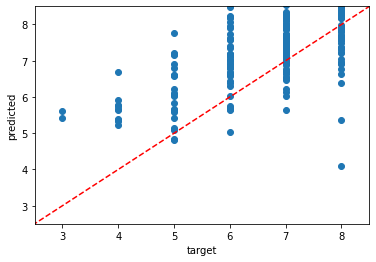

In [188]:
#Make prediction
y = model.predict(X_test)

##Plot t_text vs y 
plt.scatter(t_test, y)

# dashed diagonal line
plt.plot([0,10], [0, 10], 'r--')
# x and y axis range
plt.xlim([2.5, 8.5])
plt.ylim([2.5, 8.5])
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")

Text(0, 0.5, 'rings')

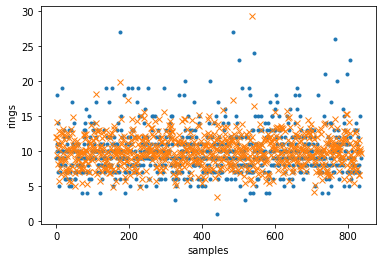

In [189]:
plt.plot(t_test.to_numpy(), '.')
plt.plot(y, 'x')
plt.xlabel("samples")
plt.ylabel("rings")

#Drilling Down

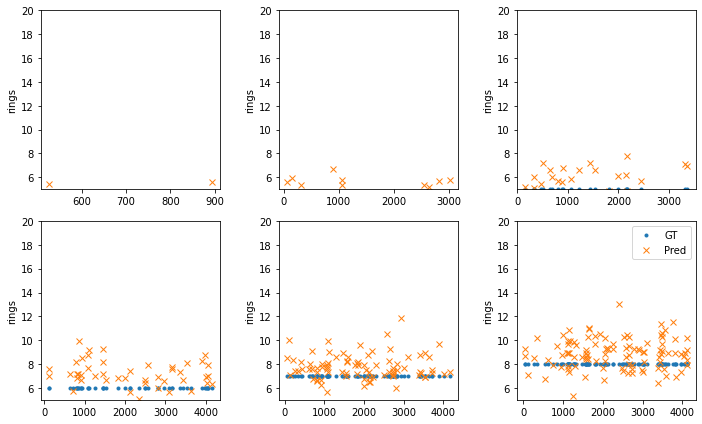

In [190]:
test = t_test.to_numpy()
GT = pd.DataFrame({'x':t_test, 'y':y})
plt.figure(figsize=(10,6))
for k in range(3,9):
    plt.subplot(2,3, k-2)

    plt.plot(GT.loc[:,'x'].where(GT['x']==k), '.')
    plt.plot(GT.loc[:,'y'].where(GT['x']==k), 'x')
    plt.ylim((5,20))
    plt.ylabel("rings")
plt.legend(['GT', 'Pred'])
plt.tight_layout()

#Here we just create a little efficiency

In [191]:
def evaluate(y, t):
    plt.figure(figsize=(10,10))

    # t vs y plot
    plt.subplot(3,3, 1)
    # add the first plot
    plt.scatter(t, y)
    # dashed diagonal line
    plt.plot([0,10], [0, 10], 'r--')
    # x and y axis range
    plt.xlim([2.5, 8.5])
    plt.ylim([2.5, 8.5])
    # x and y labels
    plt.xlabel("target")
    plt.ylabel("predicted")
    
    
    
    # all value comparison
    plt.subplot(3,2, 2)
    #add the second one
    plt.plot(t, '.')
    plt.plot(y, 'x')
    plt.xlabel("samples")
    plt.ylabel("rings")
    
    # subplots of individual ring comparision


    GT = pd.DataFrame({'x':t, 'y':y})
    plt.figure(figsize=(10,6))
    for k in range(3,9):
        plt.subplot(2,3, k-2)

        plt.plot(GT.loc[:,'x'].where(GT['x']==k), '.')
        plt.plot(GT.loc[:,'y'].where(GT['x']==k), 'x')
        plt.ylim((2.5,8.5))
        plt.ylabel("rings")
    plt.legend(['GT', 'Pred'])
    plt.tight_layout()

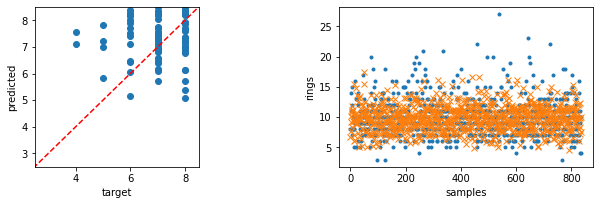

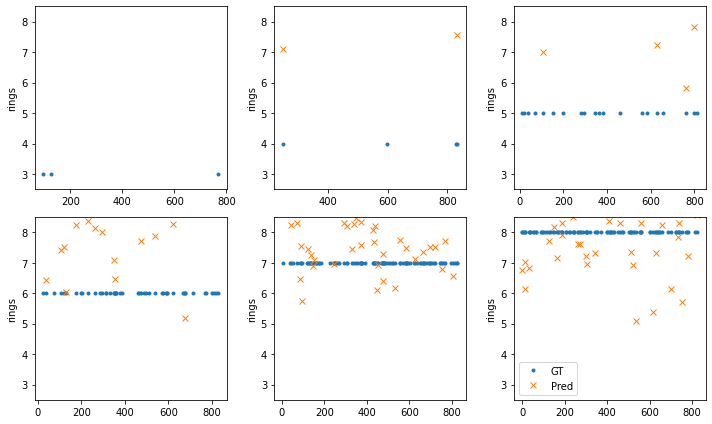

In [171]:
evaluate(y, t_test.to_numpy())

#Further Testing with 'Sex' feature
Here I will use the copy we made earlier

In [197]:
X_train, X_test, t_train, t_test = train_test_split(df_copy.iloc[:, 1:], df_copy['Sex'], test_size=0.2)

In [206]:
from sklearn.linear_model import LogisticRegression

#Create a LogReg instance
logreg = LogisticRegression(max_iter=10000,random_state=0)

#Train the model
logreg.fit(X_train, t_train)

#Evaluate
train_score = logreg.score(X_train, t_train)
test_score = logreg.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.5612092187967674, Test Accuracy: 0.5299043062200957


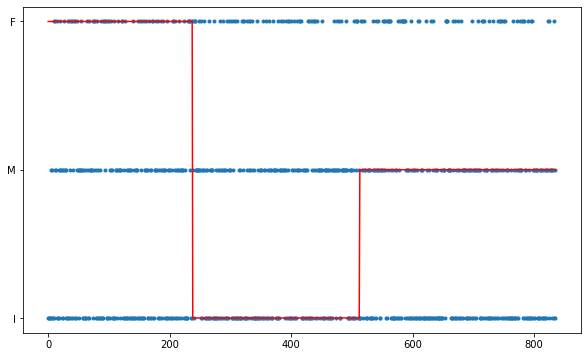

In [208]:
#Compute the predictions for test data 'X_test'
Test = logreg.predict(X_test)
#Sort t_test with argsort in Numpy
sorted = np.sort(t_test)

#present the sorted index
plt.figure(figsize=(10,6))
plt.plot(Test, '.')
plt.plot(sorted, 'r-')


#Iterative Testing

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [204]:
X_train, X_test, t_train, t_test = train_test_split(df_copy.iloc[:, 1:], df_copy['Sex'], test_size=0.2)

Here we create three models, evaluate and visualize iteratively

Logistic Reg
Train Accuracy: 0.5612092187967674, Test Accuracy: 0.5299043062200957
MCC:  0.2887249819146878
              precision    recall  f1-score   support

           F       0.43      0.31      0.36       238
           I       0.64      0.80      0.71       275
           M       0.47      0.46      0.46       323

    accuracy                           0.53       836
   macro avg       0.51      0.52      0.51       836
weighted avg       0.51      0.53      0.52       836

kNN
Train Accuracy: 0.6198742891349895, Test Accuracy: 0.5311004784688995
MCC:  0.2934549532323584
              precision    recall  f1-score   support

           F       0.39      0.38      0.38       238
           I       0.69      0.76      0.72       275
           M       0.49      0.45      0.47       323

    accuracy                           0.53       836
   macro avg       0.52      0.53      0.52       836
weighted avg       0.52      0.53      0.53       836

Naive Bayes
Train Accuracy: 0.5

<Figure size 2160x2160 with 0 Axes>

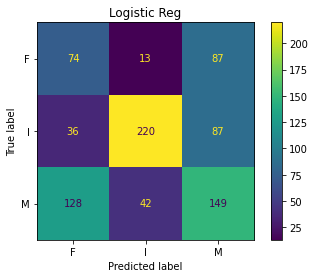

<Figure size 2160x2160 with 0 Axes>

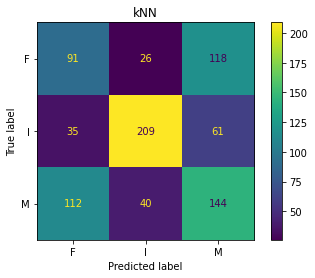

<Figure size 2160x2160 with 0 Axes>

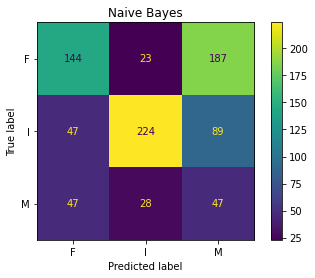

In [205]:
logreg = LogisticRegression(max_iter=10000,random_state=0)
knn = KNeighborsClassifier(n_neighbors=15)
nb = GaussianNB()

# list of algorithms to test
models = [ logreg, knn, nb]
# list of algorithm names 
names = ["Logistic Reg", "kNN", "Naive Bayes"]

#loop through each of the modesls
for name, model in zip(names, models):
    print(name)

    #fit
    model.fit(X_train, t_train)
    y_test = model.predict(X_test)
    #### 
    #evaluate
    train_score = model.score(X_train, t_train)
    test_score  = model.score(X_test, t_test)
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))
    
    #print
    print("MCC: ", matthews_corrcoef(t_test, y_test))

    print(classification_report(t_test, y_test))
             
    #visualize
    plt.figure(figsize = (30,30))
    cm = confusion_matrix(y_test, t_test, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    plt.title(name)